In [ ]:
library(ggplot2)
library(readr)
library(dplyr)
install.packages("corrplot")
library(corrplot)
install.packages("VIM")
library(VIM)
Happiness <- read_csv("WorldHappiness_Corruption_2015_2020.csv")

head(Happiness)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Rows: 792 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, continent
dbl (11): happiness_score, gdp_per_capita, family, health, freedom, generosi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Norway,7.537,1.616463,1.533524,0.7966665,0.6354226,0.3620122,0.3159638,2.277027,Europe,2015,0,88
Denmark,7.522,1.482383,1.551122,0.7925655,0.6260067,0.3552805,0.4007701,2.313707,Europe,2015,0,91
Iceland,7.504,1.480633,1.610574,0.8335521,0.6271626,0.4755402,0.1535266,2.322715,Europe,2015,0,79
Switzerland,7.494,1.564980,1.516912,0.8581313,0.6200706,0.2905493,0.3670073,2.276716,Europe,2015,0,86
Finland,7.469,1.443572,1.540247,0.8091577,0.6179509,0.2454828,0.3826115,2.430182,Europe,2015,0,90
Netherlands,7.377,1.503945,1.428939,0.8106961,0.5853845,0.4704898,0.2826618,2.294804,Europe,2015,0,84


In [ ]:
# Cleaning Data that is missing
Happiness_clean <- select(Happiness, -family, -freedom:-continent, -social_support)
numeric_set <- select(Happiness_clean, -Country)
colnames(numeric_set)[2] <- "GDP"
colnames(numeric_set)[5] <- "CPI"

numeric_set[numeric_set==0] <- NA
which(is.na(numeric_set$happiness_score))
which(is.na(numeric_set$health))

numeric_set[782,]
numeric_set[c(236,495,623), ]

# Mengecek apakah ada NA yang ditemukan sekarang
numeric_set <- na.omit(numeric_set)
numeric_set


integer(0)

[1] 236 495 623

happiness_score,GDP,health,Year,CPI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.7753,NA,0.2952128,2020,19


happiness_score,GDP,health,Year,CPI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.507,0.33024,NA,2016,30
4.571,0.25600,NA,2018,30
4.635,0.36485,NA,2019,33


happiness_score,GDP,health,Year,CPI
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.537,1.6164632,0.7966665,2015,88
7.522,1.4823830,0.7925655,2015,91
7.504,1.4806330,0.8335521,2015,79
7.494,1.5649796,0.8581313,2015,86
7.469,1.4435719,0.8091577,2015,90
7.377,1.5039446,0.8106961,2015,84
7.316,1.4792044,0.8345577,2015,83
7.314,1.4057060,0.8167597,2015,91
7.284,1.4943873,0.8308752,2015,89


## Correlation between Variables

In [ ]:
cor.test(numeric_set$GDP, numeric_set$happiness_score)


	Pearson's product-moment correlation

data:  numeric_set$GDP and numeric_set$happiness_score
t = 36.452, df = 786, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7651932 0.8172680
sample estimates:
     cor 
0.792672 


In [ ]:
cor.test(numeric_set$CPI, numeric_set$happiness_score)


	Pearson's product-moment correlation

data:  numeric_set$CPI and numeric_set$happiness_score
t = 26.847, df = 786, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6533456 0.7263806
sample estimates:
     cor 
0.691627 


In [ ]:
cor.test(numeric_set$health, numeric_set$happiness_score)


	Pearson's product-moment correlation

data:  numeric_set$health and numeric_set$happiness_score
t = 32.432, df = 786, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7249902 0.7848946
sample estimates:
     cor 
0.756525 


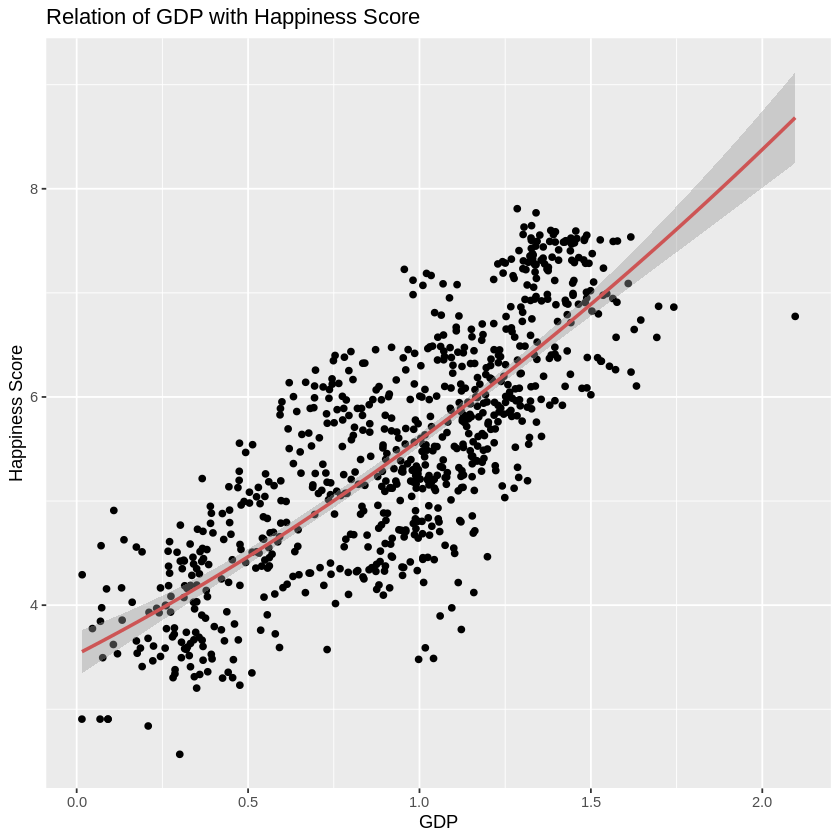

In [ ]:
ggplot(numeric_set, aes(x = GDP, y = happiness_score)) + 
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "indianred3") +
   theme(legend.position = "FALSE") +
      labs(title = "Relation of GDP with Happiness Score",
           x = "GDP",
           y = "Happiness Score")     
            

Gross domestic product or in short GDP are used to measure domestic product price by each nation, or in other word GDP are used to measure a nation's own income. The graph above shows the relation between GDP and the happiness score of each country. The graph explains that GDP has a positive relationship with happiness score, as seen from the red line in the graph. With that said, we can conclude that the higher GDP of a certain country the more likely you will have a greater happiness score for a country.

This outcome can be explained by multiple researches from different experts. Most experts did say that a higher income for a country would result in a higher happiness for its citizens, such as what Richard Easterlin said from his research paper. Robbins in 1938 suggested a proposition, where after the GDP had reached a certain level, happiness values will begin to increase more, due to the arrival of quality of life changes brought upon by that GDP level. http://www.datamining.org.uk/MSC_THESIS_FINAL_VERSION.pdf



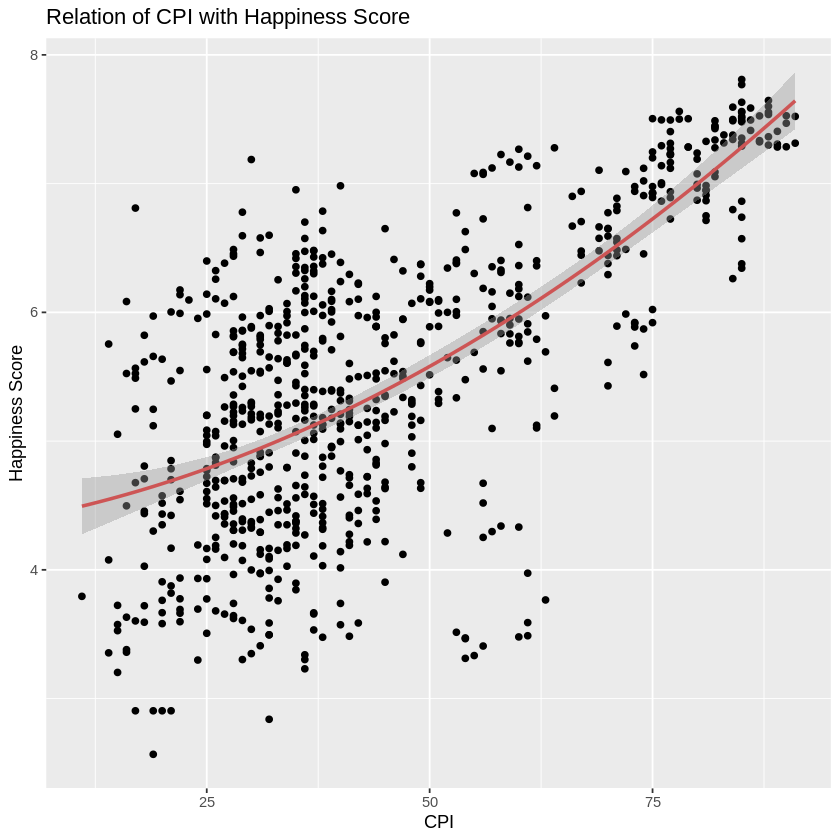

In [ ]:
ggplot(numeric_set, aes(x = CPI, y = happiness_score)) + 
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "indianred3") +
   theme(legend.position = "FALSE") +
      labs(title = "Relation of CPI with Happiness Score",
           x = "CPI",
           y = "Happiness Score")          

Corruption Perception Index or in short term CPI are use to measure corruption level at a worldwide standstill. in the graph above it is shown the relation between CPI and happiness score. the graph above shows the relation between CPI and happiness score has a positive relation althought the relation is not as related as GDP and happiness score.

The outcome is explained by the fact that a higher CPI score means that corruption becomes more easier to be found and felt when occured. With civilians starting to become concerned about it, politicians or government officials will start adopting a stance against corruption. As a result, corruption would then decline and civilians will start to gain more life satisfactions. Thus proving that a higher CPI to detect corruption and lowers it, will result in a higher happiness score.

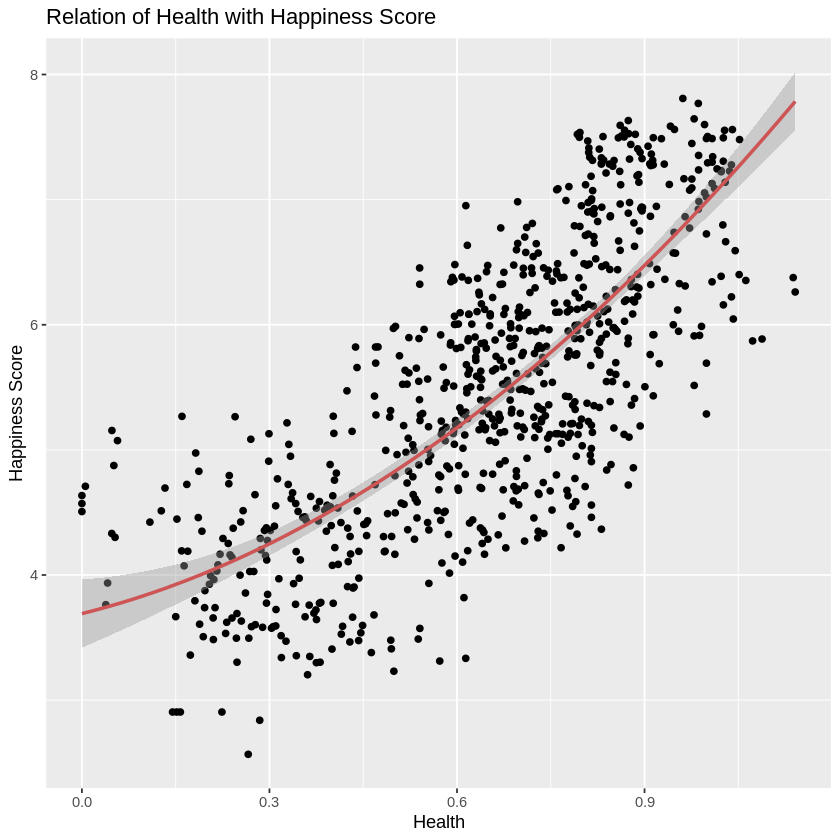

In [ ]:
ggplot(Happiness, aes(x = health, y = happiness_score)) + 
  geom_point() + 
  geom_smooth(method = "lm", formula = y ~ poly(x, 2), color = "indianred3") +
       theme(legend.position = "FALSE") +
      labs(title = "Relation of Health with Happiness Score",
           x = "Health",
           y = "Happiness Score")          
            

Health is used to measure the well being of each citizens from each country from the data. In the graph above, it is shown that the relation between health and happiness score is as we can see, are positive relation. Thus it can be inferred that the higher the health score of each country in general, then their happiness score will rise as well.

The result of the graph may be supported with the fact that some researchers agreed that health and happiness go hand in hand together. This conclussion of the relation is more clarified with what Robert Holden says "There is no true happiness without health". Some data also suggested that an unhealthy body could be the cause for the decline of happiness for a person, because when you are unhappy, the immune defense of your body will decrease, which will result in diseases easily infecting and attacking the body.


### 1. Separated between independent (X) and depedent (y) variable

In [ ]:
summary(Happiness)

   Country          happiness_score gdp_per_capita       family     
 Length:792         Min.   :2.567   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:4.591   1st Qu.:0.6442   1st Qu.:0.000  
 Mode  :character   Median :5.486   Median :0.9945   Median :0.000  
                    Mean   :5.473   Mean   :0.9292   Mean   :0.505  
                    3rd Qu.:6.301   3rd Qu.:1.2287   3rd Qu.:1.040  
                    Max.   :7.809   Max.   :2.0960   Max.   :1.611  
     health          freedom         generosity     government_trust 
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.5101   1st Qu.:0.3254   1st Qu.:0.1258   1st Qu.:0.05286  
 Median :0.6854   Median :0.4396   Median :0.1970   Median :0.08900  
 Mean   :0.6487   Mean   :0.4270   Mean   :0.2124   Mean   :0.12572  
 3rd Qu.:0.8156   3rd Qu.:0.5463   3rd Qu.:0.2732   3rd Qu.:0.15425  
 Max.   :1.1410   Max.   :0.7240   Max.   :0.8381   Max.   :0.55191  
 dystopia_residual  contine

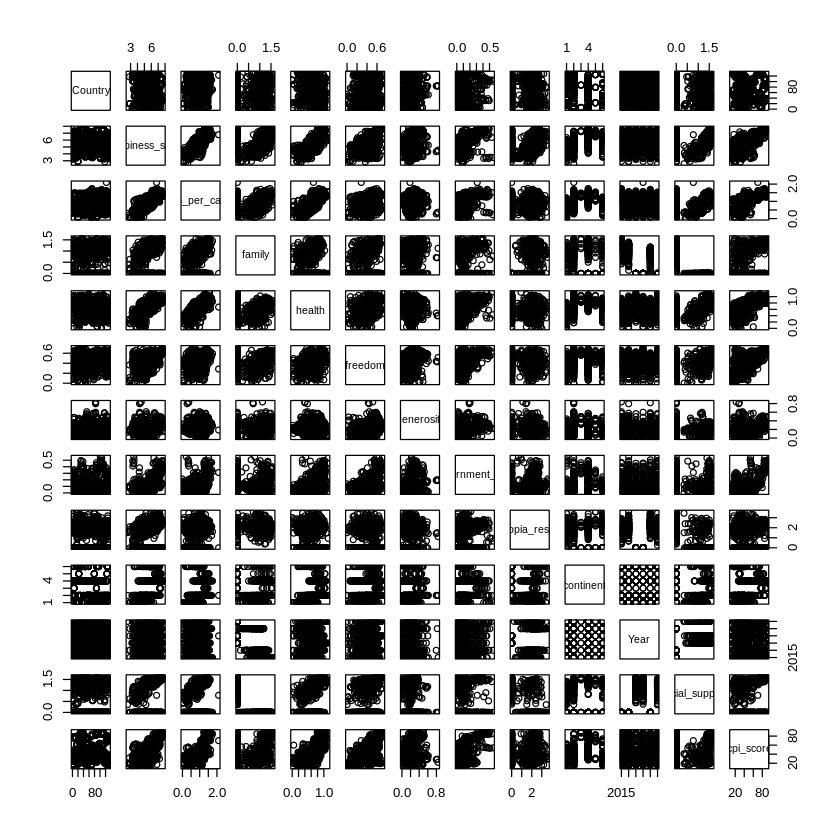

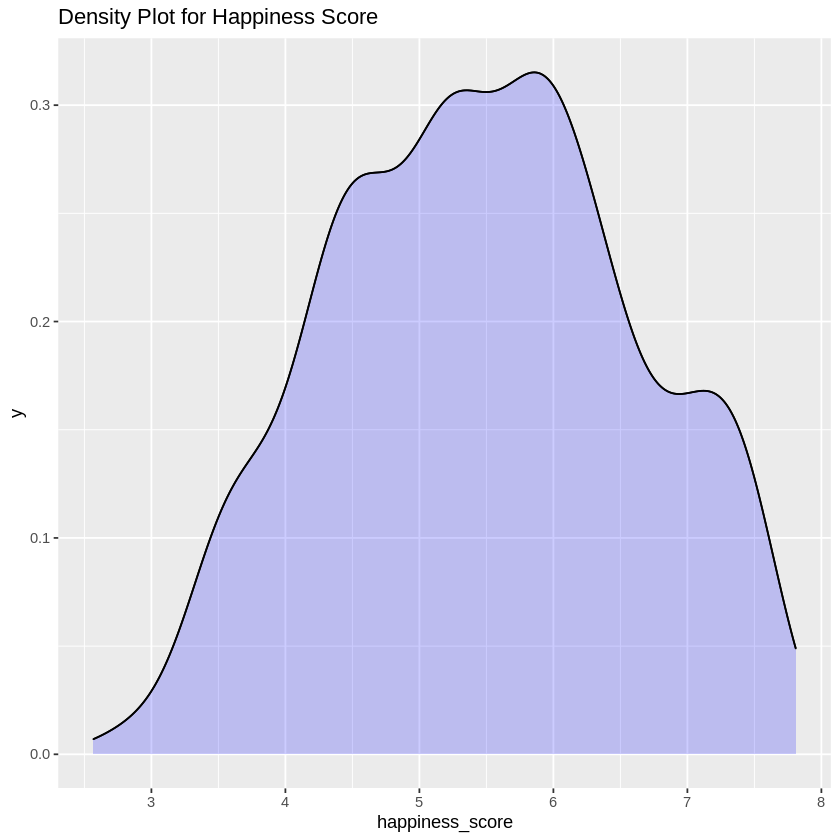

In [ ]:
plot (Happiness)

ggplot(Happiness, aes(x=happiness_score)) +
  geom_density(fill="blue", alpha=0.2) +
   geom_line(stat="density") + 
    # geom_histogram(fill="red", alpha=0.1, size=0.2, binwidth = 0.0001)+
   expand_limits(y=0)+
     labs(title = "Density Plot for Happiness Score")

### 2) Finding the missing value and imputation

Karena pembuat dataset sudah mengubah missing value (NA) menjadi 0, kami tidak bisa menunjukkan missing valuesnya tanpa mengubah 0 menjadi NA. 

In [ ]:
# Mengubah smua angka 0 menjad NA
Happiness[Happiness==0] <- NA
# Mengecek apakah ada NA yang ditemukan sekarang
print("Ini yang ada NA")
print("")
pctmiss <- colSums(is.na(Happiness))/nrow(Happiness)
round(pctmiss, 2)

#Mengubah NA menjadi sebuah value mengikuti ketentuan berikut:
# 1. Jika tipe data yang hilang adalah numeric, maka akan dicari k data yang mempunyai kasus yang mirip dengan posisi missing value. 
# Kemudian akan digunakan rata2 mereka untuk mengganti missing value

# 2. Jika yang hilang adalah categorical, nilai yang paling sering muncul dari rentang k akan digunakan.

print("")
print("Ini yang NA SUDAH DIUBAH KE RATA-RATA")
print("")
# newData <- kNN(Happiness, k=5)

# pctmiss <- colSums(is.na(newData))/nrow(newData)
# round(pctmiss, 2)

[1] "Ini yang ada NA"
[1] ""


Country   happiness_score    gdp_per_capita            family 
              NaN               NaN               NaN               NaN 
           health           freedom        generosity  government_trust 
              NaN               NaN               NaN               NaN 
dystopia_residual         continent              Year    social_support 
              NaN               NaN               NaN               NaN 
        cpi_score 
              NaN

[1] ""
[1] "Ini yang NA SUDAH DIUBAH KE RATA-RATA"
[1] ""


### 3) Finding the outlier and remove or handling the outlier





In [ ]:
sapply(Happiness, mode)

Country   happiness_score    gdp_per_capita            family 
      "character"         "numeric"         "numeric"         "numeric" 
           health           freedom        generosity  government_trust 
        "numeric"         "numeric"         "numeric"         "numeric" 
dystopia_residual         continent              Year    social_support 
        "numeric"       "character"         "numeric"         "numeric" 
        cpi_score 
        "numeric"

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


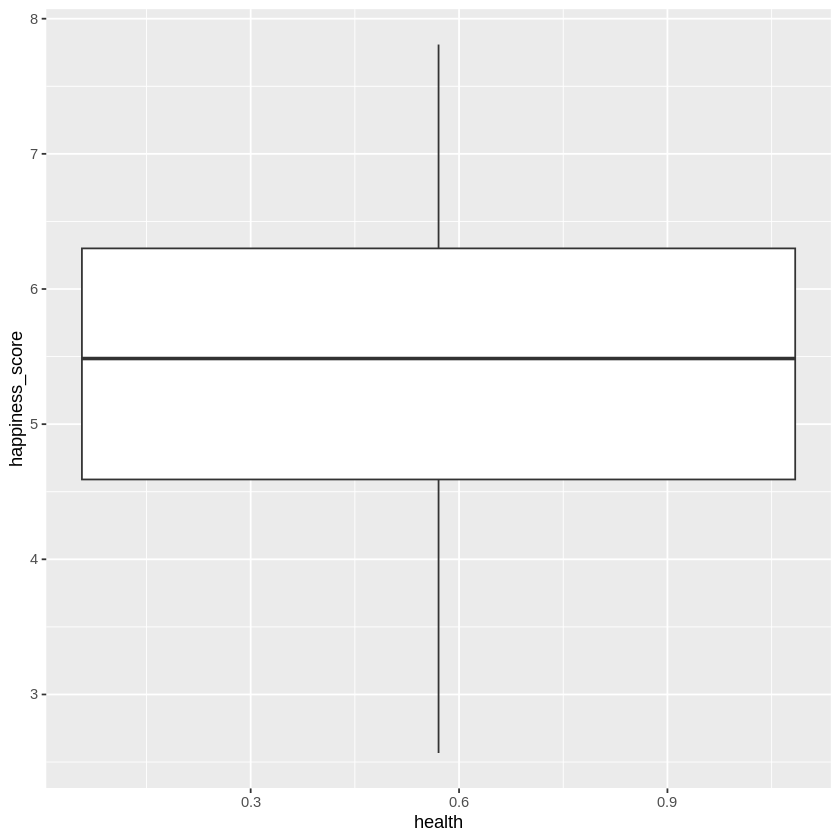

In [ ]:
happiness_gdp <- select(Happiness, "happiness_score", "health")

outliers <- happiness_gdp %>%
  group_by(health)

ggplot(outliers, aes(x=health, y = happiness_score)) + 
  geom_boxplot()


Dari boxplot diatas, terlihat bahwa outlier ada di Africa, Asia, Australia, dan South America. Kita akan menghapus outlier milik Africa dan South America karena mereka mempunyai jumlah outlier paling banyak dibanding yg lain.

In [ ]:
outliers_SA <- filter(outliers, continent %in% c("South America"))
outliers_A <- filter(outliers, continent %in% c("Africa"))

summary(outliers_SA)
summary(outliers_A)

 happiness_score gdp_per_capita    continent        
 Min.   :3.507   Min.   :0.1742   Length:120        
 1st Qu.:5.676   1st Qu.:0.7583   Class :character  
 Median :6.005   Median :0.9186   Mode  :character  
 Mean   :5.866   Mean   :0.8716                     
 3rd Qu.:6.422   3rd Qu.:1.0555                     
 Max.   :7.226   Max.   :1.2528                     

 happiness_score gdp_per_capita    continent        
 Min.   :2.839   Min.   :0.0000   Length:192        
 1st Qu.:3.853   1st Qu.:0.3047   Class :character  
 Median :4.368   Median :0.4520   Mode  :character  
 Mean   :4.354   Mean   :0.5376                     
 3rd Qu.:4.744   3rd Qu.:0.8749                     
 Max.   :6.355   Max.   :1.1982                     

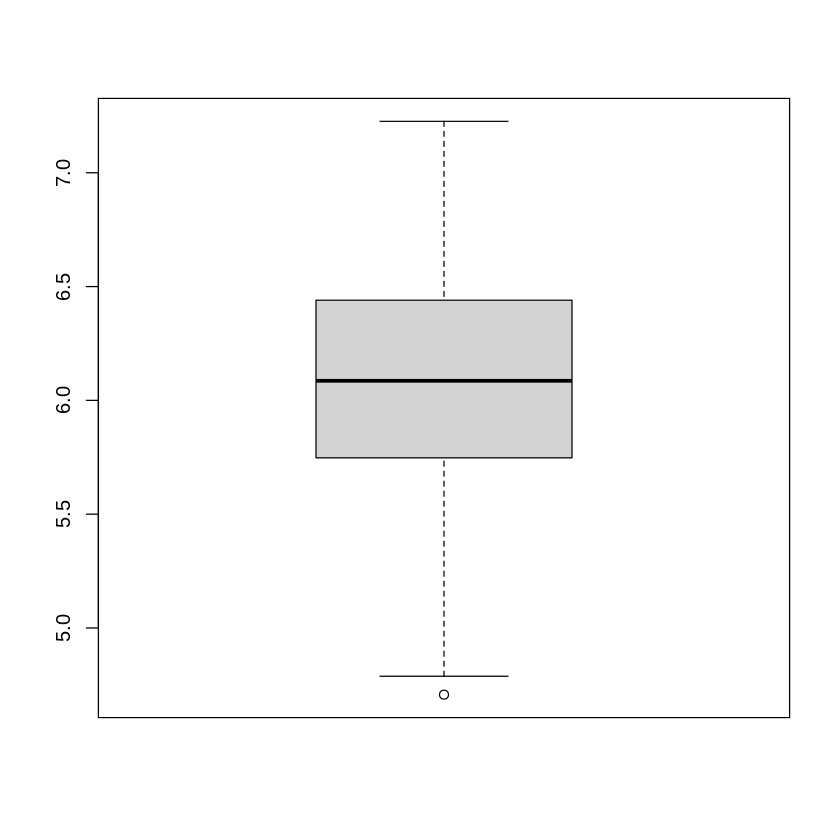

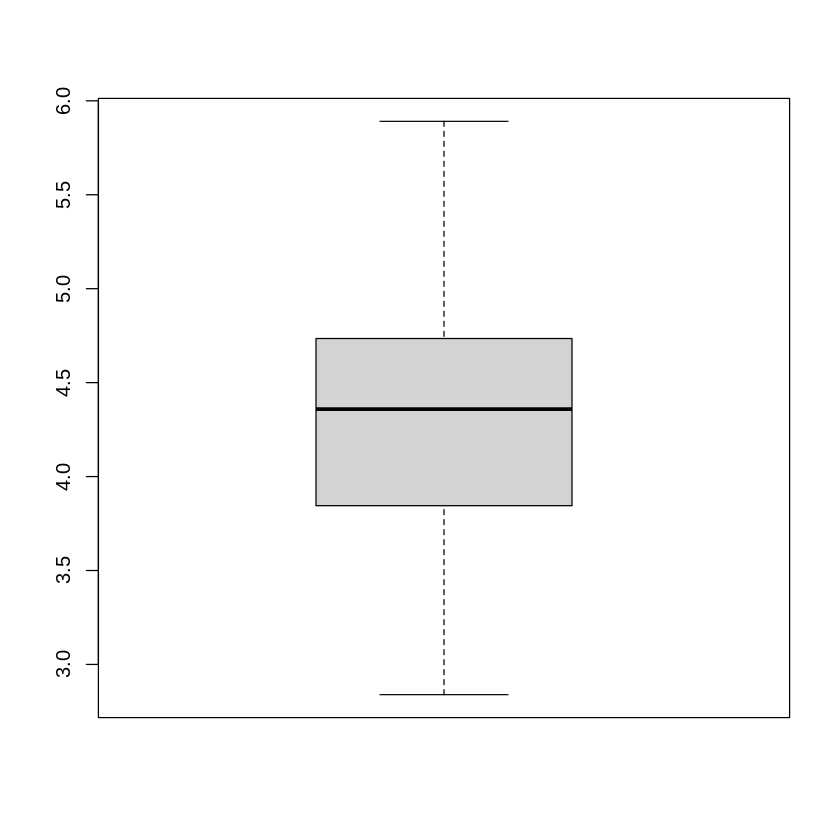

In [ ]:
quartile_SA <- quantile(outliers_SA$happiness_score, probs=c(.25, .75), na.rm = FALSE)
quartile_A <- quantile(outliers_A$happiness_score, probs=c(.25, .75), na.rm = FALSE)
IQR_SA <- IQR(outliers_SA$happiness_score)
IQR_A <- IQR(outliers_A$happiness_score)

lower_SA <- quartile_SA[1] - 1.5 * IQR_SA
lower_A <- quartile_A[1] - 1.5 * IQR_A
upper_SA <- quartile_SA[2] + 1.5 * IQR_SA
upper_A <- quartile_A[2] + 1.5 * IQR_A

outliers_SA_clean <- subset(outliers_SA, outliers_SA$happiness_score > lower_SA & outliers_SA$happiness_score < upper_SA)
outliers_A_clean <- subset(outliers_A, outliers_A$happiness_score > lower_A & outliers_A$happiness_score < upper_A)

boxplot(outliers_SA_clean$happiness_score, horizontal=FALSE, axes=TRUE)
boxplot(outliers_A_clean$happiness_score, horizontal=FALSE, axes=TRUE)

Dari sini, terlihat outlier Africa dan South America sudah dibersihkan.

### 4) Correlation between features

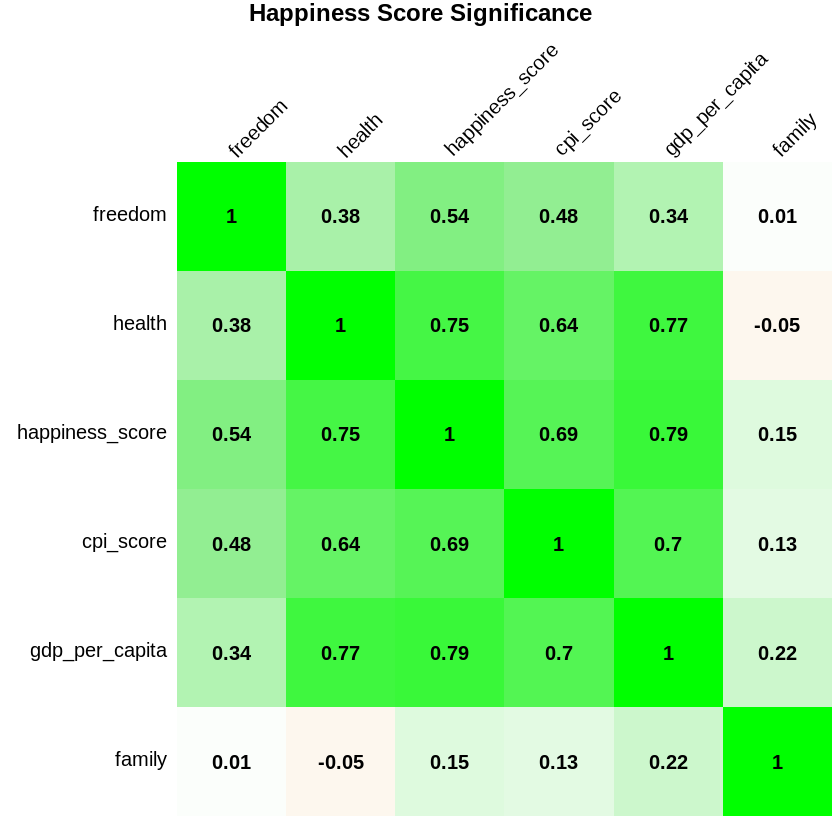

In [ ]:
#Memilih kolom data yang akan digunakan untuk melihat hubungannya dengan happiness score

correlation_happiness <- select(Happiness, "happiness_score", "gdp_per_capita", "cpi_score", "health", "family", "freedom")
correlation_happiness <- na.omit(correlation_happiness)

correlation_happiness <- round(cor(correlation_happiness), 2)
col <- colorRampPalette(c("#FFA500", "#F1B04C", "#FFFFFF", "#90EE90", "#00FF00"))

corrplot(correlation_happiness, method = "shade", shade.col = NA, tl.col = "black", tl.srt = 45, 
        col = col(200), title = "Happiness Score Significance", mar=c(0,0,1,0),
          addCoef.col = "black", cl.pos = "n", order = "AOE")

Dari correlation plot ini dapat terlihat hubungan antara variabel yang sudah dipilih antar satu sama lain, tentu saja dengan fokus utama pada happiness scorenya. Dapat terlihat banyak warna hijau yang ditemukan dalam korelasi plot, yang menandakan banyaknya korelasi positif antar sesama variabel. 

Semakin positif angka yang ada di korelasi plot, maka semakin besar hubungan positif antara dua variabel tersebut. Sebaliknya, semakin negatif angka tersebut menunjukkan hubungan yang berlawanan antara dua buah variabel. Angka 0 menunjukkan tidak adanya hubungan sama sekali.

Dari semua variabel, terlihat variabel family mempunyai hubungan yang kecil antar variabel lain, baik itu hubungan yang positif, maupun negatif, bahkan ada yang hampir tidak ada hubungannya dengan variabel tersebut (family dengan freedom).